# Random Graph

import

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from scipy.stats import norm
import time
from collections import Counter
import json


First step with a given probability

In [54]:

def largest_connected_component_size(graph):
    components = list(nx.connected_components(graph))
    return len(max(components, key=len))
nbNodes = [100, 1000, 10000]
for n in nbNodes:
    start_time = time.time()
    p = 0.01
    graph = nx.erdos_renyi_graph(n, p)
    elapsed_time = time.time() - start_time
    print(f"Temps d'exécution pour {n} noeuds:", elapsed_time)
    # plt.figure(figsize=(10, 6))
    # nx.draw(graph, with_labels=False, node_size=5)
    # plt.title(f'Graph with {p}')
    # plt.show()

    print(f"Nombre d'arêtes dans le graphe pour {n} noeuds:", graph.number_of_edges())
    print(f"Taille du plus grand composant connexe pour {n} noeuds:", largest_connected_component_size(graph))


Temps d'exécution pour 100 noeuds: 0.0010061264038085938
Nombre d'arêtes dans le graphe pour 100 noeuds: 58
Taille du plus grand composant connexe pour 100 noeuds: 34
Temps d'exécution pour 1000 noeuds: 0.054991960525512695
Nombre d'arêtes dans le graphe pour 1000 noeuds: 4922
Taille du plus grand composant connexe pour 1000 noeuds: 999
Temps d'exécution pour 10000 noeuds: 4.985995292663574
Nombre d'arêtes dans le graphe pour 10000 noeuds: 500790
Taille du plus grand composant connexe pour 10000 noeuds: 10000


0.01 is already to high as probability so we will go from 0 top 0.01 with 0.001 steps

In [55]:
NODES = 10000
GRAPHS = 10

p_values = np.linspace(0.001, 0.01, 50)
#dict with p as key and mean percentage of nodes in largest connected component as value
percentage_of_nodes = {}

#dict with p as key and mean degree as value
average_degrees = {}
cpt = 0
for i,p in enumerate(p_values):
    mean_percentage = []
    #list to strore all degrees
    all_degrees = []
    #Ten GRAPHS in order to get average values
    for j in range(1, GRAPHS+1):
        cpt+=1
        progres_graph = cpt/(GRAPHS*len(p_values))*100
        print(f"Progression: {progres_graph:.2f}%")
        graph = nx.erdos_renyi_graph(NODES, p)
        mean_percentage.append((largest_connected_component_size(graph)/NODES)*100)
        degrees = [degree for node, degree in graph.degree()]
        all_degrees.extend(degrees)
        
        
    degree_distribution = dict(Counter(all_degrees))
    average_degrees[p] = degree_distribution
    percentage_of_nodes[p] = np.mean(mean_percentage)
    
    with open("sources/first_average_degrees.json", "w") as f:
        json.dump(average_degrees, f)
        
    with open("sources/first_percentage_of_nodes.json", "w") as f:
        json.dump(percentage_of_nodes, f)    

Progression: 0.20%
Progression: 0.40%
Progression: 0.60%
Progression: 0.80%
Progression: 1.00%
Progression: 1.20%
Progression: 1.40%
Progression: 1.60%
Progression: 1.80%
Progression: 2.00%
Progression: 2.20%
Progression: 2.40%
Progression: 2.60%
Progression: 2.80%
Progression: 3.00%
Progression: 3.20%
Progression: 3.40%
Progression: 3.60%
Progression: 3.80%
Progression: 4.00%
Progression: 4.20%
Progression: 4.40%
Progression: 4.60%
Progression: 4.80%
Progression: 5.00%
Progression: 5.20%
Progression: 5.40%
Progression: 5.60%
Progression: 5.80%
Progression: 6.00%
Progression: 6.20%
Progression: 6.40%
Progression: 6.60%
Progression: 6.80%
Progression: 7.00%
Progression: 7.20%
Progression: 7.40%
Progression: 7.60%
Progression: 7.80%
Progression: 8.00%
Progression: 8.20%
Progression: 8.40%
Progression: 8.60%
Progression: 8.80%
Progression: 9.00%
Progression: 9.20%
Progression: 9.40%
Progression: 9.60%
Progression: 9.80%
Progression: 10.00%
Progression: 10.20%
Progression: 10.40%
Progressi

Let's plot values for p in 0.001, 0.01

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'0.001': 99.995, '0.0011836734693877551': 99.997, '0.0013673469387755102': 100.0, '0.0015510204081632655': 100.0, '0.0017346938775510204': 100.0, '0.0019183673469387757': 100.0, '0.002102040816326531': 100.0, '0.002285714285714286': 100.0, '0.0024693877551020408': 100.0, '0.002653061224489796': 100.0, '0.0028367346938775514': 100.0, '0.0030204081632653063': 100.0, '0.0032040816326530616': 100.0, '0.0033877551020408164': 100.0, '0.0035714285714285718': 100.0, '0.0037551020408163266': 100.0, '0.003938775510204082': 100.0, '0.004122448979591837': 100.0, '0.004306122448979592': 100.0, '0.004489795918367347': 100.0, '0.004673469387755102': 100.0, '0.004857142857142858': 100.0, '0.0050408163265306125': 100.0, '0.005224489795918367': 100.0, '0.005408163265306123': 100.0, '0.005591836734693878': 100.0, '0.005775510204081633': 100.0, '0.005959183673469389': 100.0, '0.0061428571428571435': 100.0, '0.006326530612244898': 100.0, '0.006510204081632653': 100.0, '0.006693877551020409': 100.0, '0.006

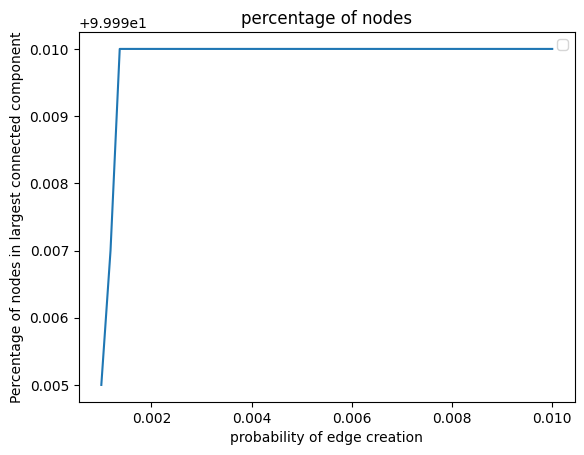

In [68]:
with open('sources/first_average_degrees.json') as f:
    average_degrees = json.load(f)
    
with open('sources/first_percentage_of_nodes.json') as f:
    percentage_of_nodes = json.load(f)

keys = [float(k) for k in percentage_of_nodes.keys()]
values = list(percentage_of_nodes.values())
plt.plot(keys,values)
plt.title('percentage of nodes')
plt.xlabel('probability of edge creation')
plt.ylabel('Percentage of nodes in largest connected component')
plt.legend()
plt.show()

So we are quickly to 100% of node in the largest component so p_limit< 0.002

Let's try between 0.0001 and 0.002

In [70]:
NODES = 10000
GRAPHS = 10

p_values = np.linspace(0.0001, 0.002, 50)
#dict with p as key and mean percentage of nodes in largest connected component as value
percentage_of_nodes = {}

#dict with p as key and mean degree as value
average_degrees = {}
cpt = 0
for i,p in enumerate(p_values):
    mean_percentage = []
    #list to strore all degrees
    all_degrees = []
    #Ten GRAPHS in order to get average values
    for j in range(1, GRAPHS+1):
        cpt+=1
        progres_graph = cpt/(GRAPHS*len(p_values))*100
        print(f"Progression: {progres_graph:.2f}%")
        graph = nx.erdos_renyi_graph(NODES, p)
        mean_percentage.append((largest_connected_component_size(graph)/NODES)*100)
        degrees = [degree for node, degree in graph.degree()]
        all_degrees.extend(degrees)
        
        
    degree_distribution = dict(Counter(all_degrees))
    average_degree_distribution = {k: v / len(all_degrees) for k, v in degree_distribution.items()}
    average_degrees[p] = average_degree_distribution
    percentage_of_nodes[p] = np.mean(mean_percentage)
    
    with open("sources/second_average_degrees.json", "w") as f:
        json.dump(average_degrees, f, indent=4)
        
    with open("sources/second_percentage_of_nodes.json", "w") as f:
        json.dump(percentage_of_nodes, f, indent=4)    

Progression: 0.20%
Progression: 0.40%
Progression: 0.60%
Progression: 0.80%
Progression: 1.00%
Progression: 1.20%
Progression: 1.40%
Progression: 1.60%
Progression: 1.80%
Progression: 2.00%
Progression: 2.20%
Progression: 2.40%
Progression: 2.60%
Progression: 2.80%
Progression: 3.00%
Progression: 3.20%
Progression: 3.40%
Progression: 3.60%
Progression: 3.80%
Progression: 4.00%
Progression: 4.20%
Progression: 4.40%
Progression: 4.60%
Progression: 4.80%
Progression: 5.00%
Progression: 5.20%
Progression: 5.40%
Progression: 5.60%
Progression: 5.80%
Progression: 6.00%
Progression: 6.20%
Progression: 6.40%
Progression: 6.60%
Progression: 6.80%
Progression: 7.00%
Progression: 7.20%
Progression: 7.40%
Progression: 7.60%
Progression: 7.80%
Progression: 8.00%
Progression: 8.20%
Progression: 8.40%
Progression: 8.60%
Progression: 8.80%
Progression: 9.00%
Progression: 9.20%
Progression: 9.40%
Progression: 9.60%
Progression: 9.80%
Progression: 10.00%
Progression: 10.20%
Progression: 10.40%
Progressi

Let's plot values for p in 0.0001-0.002

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


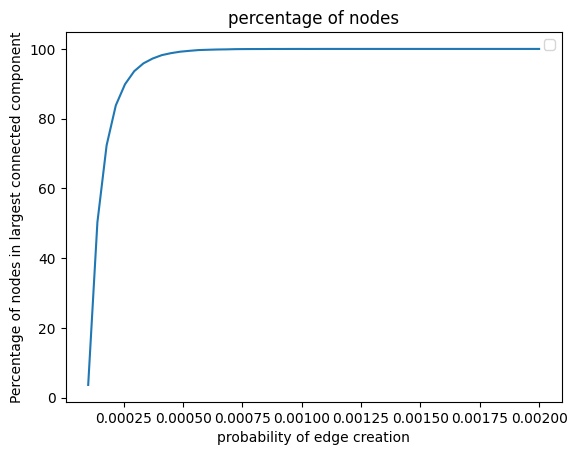

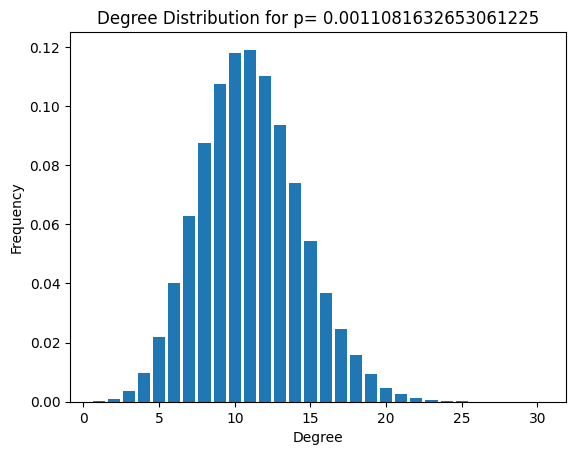

In [75]:
with open('sources/second_average_degrees.json') as f:
    average_degrees = json.load(f)
    
with open('sources/second_percentage_of_nodes.json') as f:
    percentage_of_nodes = json.load(f)

keys = [float(k) for k in percentage_of_nodes.keys()]
values = list(percentage_of_nodes.values())
plt.plot(keys,values)
plt.title('percentage of nodes')
plt.xlabel('probability of edge creation')
plt.ylabel('Percentage of nodes in largest connected component')
plt.legend()
plt.show()

#Select keys we want to plot 


# for p,distribution in average_degrees.items():
#     degrees = [int(degree) for degree in distribution.keys()]
#     frequencies = list(distribution.values())
#     plt.bar(degrees, frequencies)
#     plt.title(f'Degree Distribution for p={p}')
#     plt.xlabel('Degree')
#     plt.ylabel('Frequency')
#     plt.show()
    
    
degrees = [int(degree) for degree in average_degrees["0.0011081632653061225"].keys()]
frequencies = list(average_degrees["0.0011081632653061225"].values())
plt.bar(degrees, frequencies)
plt.title('Degree Distribution for p= 0.0011081632653061225')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

## Bilan 

The probability limite is 0.0011081632653061225.
The average degrees distribution quickly follow a normal distribution 

# Simple graph formation game